In [1]:
# Importing Dependencies
from pathlib import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Filter Warnings
from warnings import filterwarnings 

# Load both datasets and merge via inner join

In [2]:
# Loading netflix movie data 
netflix_file = Path('raw_data/netflix_titles.csv')
netflix_data = pd.read_csv(netflix_file)

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Loading IMDB movie rating's data
ratings_file = Path('raw_data/TMDB_all_movies.csv')
ratings_data = pd.read_csv(ratings_file)

ratings_data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
0,2,Ariel,7.082,304,Released,1988-10-21,0.0,73,0.0,tt0094675,...,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions,Finland,suomi,"Markku Rantala, Esko Nikkari, Matti Pellonpää,...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN
1,3,Shadows in Paradise,7.302,344,Released,1986-10-17,0.0,74,0.0,tt0092149,...,"Drama, Comedy, Romance",Villealfa Filmproductions,Finland,"suomi, English, svenska","Esko Nikkari, Matti Pellonpää, Sirkka Silin, H...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN
2,5,Four Rooms,5.800,2534,Released,1995-12-09,4257354.0,98,4000000.0,tt0113101,...,Comedy,"Miramax, A Band Apart",United States of America,English,"Amanda de Cadenet, Antonio Banderas, Madonna, ...","Alexandre Rockwell, Robert Rodriguez, Quentin ...","Guillermo Navarro, Phil Parmet, Rodrigo García...","Alexandre Rockwell, Robert Rodriguez, Quentin ...","Alexandre Rockwell, Lawrence Bender, Quentin T...",Combustible Edison
3,6,Judgment Night,6.527,316,Released,1993-10-15,12136938.0,109,21000000.0,tt0107286,...,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Everlast, Peter Greene, Michael DeLorenzo, Den...",Stephen Hopkins,Peter Levy,"Jere Cunningham, Lewis Colick","Marilyn Vance, Gene Levy, Lloyd Segan",Alan Silvestri
4,8,Life in Loops (A Megacities RMX),7.500,27,Released,2006-01-01,0.0,80,42000.0,tt0825671,...,Documentary,inLoops,Austria,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN


In [4]:
# Merging both CSV's 
merged_df = pd.merge(netflix_data, ratings_data, on='title', how='inner')
merged_df = merged_df.drop_duplicates(subset=['title'])

merged_df.head()

,show_id,type,title,director_x,cast_x,country,date_added,release_year,rating,duration,...,genres,production_companies,production_countries,spoken_languages,cast_y,director_y,director_of_photography,writers,producers,music_composer
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,Documentary,Big Mouth Productions,United States of America,English,"Lolita Hirst, Boris Torres, Vasthy Mompoint, C...",Kirsten Johnson,"John Wakayama Carey, Kirsten Johnson","Kirsten Johnson, Nels Bangerter","Marilyn Ness, Jason Spingarn-Koff, Katy Chevig...",NaN
1,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,"Drama, Horror",NaN,United States of America,English,"Julia Cornish, Elizabeth Vance",Tony Mandile,Tom Agnello,"F. Paul Wilson, Tony Mandile",NaN,NaN
4,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,"Animation, Family, Fantasy, Comedy, Adventure","Boulder Media, Entertainment One","Canada, Ireland",English,"Robert Cullen, Arturo A. Hernandez, Phil LaMar...","Mark Fattibene, José Luis Ucha, Robert Cullen",NaN,"Gillian M. Berrow, Tim Sullivan",Cecil Kramer,Heitor Pereira
5,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,"Drama, Fantasy, History, Science Fiction","Diproci, Ghana National Commission on Culture,...","Burkina Faso, Ethiopia, Germany, Ghana, United...",", English","Oyafunmike Ogunlano, Mzuri, Hossana Ghanaba, M...",Haile Gerima,Agustín Cubano,Haile Gerima,Haile Gerima,David J. White
8,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,Drama,"Entertainment One, Boies/Schiller Film Group, ...","Canada, United States of America",English,"Rosalind Chao, Chris O'Dowd, Loretta Devine, D...",Theodore Melfi,NaN,Matt Harris,"Dylan Sellers, Tyler Zacharia, Zack Schiller, ...",Benjamin Wallfisch


In [5]:
# Viewing general info of merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5815 entries, 0 to 17591
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   show_id                  5815 non-null   object 
 1   type                     5815 non-null   object 
 2   title                    5815 non-null   object 
 3   director_x               5087 non-null   object 
 4   cast_x                   5353 non-null   object 
 5   country                  5451 non-null   object 
 6   date_added               5814 non-null   object 
 7   release_year             5815 non-null   int64  
 8   rating                   5814 non-null   object 
 9   duration                 5813 non-null   object 
 10  listed_in                5815 non-null   object 
 11  description              5815 non-null   object 
 12  id                       5815 non-null   int64  
 13  vote_average             5815 non-null   float64
 14  vote_count             

In [6]:
merged_df.columns

Index(['show_id', 'type', 'title', 'director_x', 'cast_x', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'id', 'vote_average', 'vote_count', 'status',
       'release_date', 'revenue', 'runtime', 'budget', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'tagline', 'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'cast_y', 'director_y', 'director_of_photography',
       'writers', 'producers', 'music_composer'],
      dtype='object')

In [7]:
# Selecting the row's that display TV show data
show_data = merged_df.loc[merged_df['type']== 'TV Show',:]

In [8]:
# Double checking selected rows
show_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 1 to 17563
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   show_id                  672 non-null    object 
 1   type                     672 non-null    object 
 2   title                    672 non-null    object 
 3   director_x               64 non-null     object 
 4   cast_x                   606 non-null    object 
 5   country                  607 non-null    object 
 6   date_added               671 non-null    object 
 7   release_year             672 non-null    int64  
 8   rating                   672 non-null    object 
 9   duration                 672 non-null    object 
 10  listed_in                672 non-null    object 
 11  description              672 non-null    object 
 12  id                       672 non-null    int64  
 13  vote_average             672 non-null    float64
 14  vote_count              

In [9]:
# Dropping the selected rows (TV shoow data)
merged_df.drop(show_data.index,inplace=True)

In [10]:
# Double checking dropped rows
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5143 entries, 0 to 17591
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   show_id                  5143 non-null   object 
 1   type                     5143 non-null   object 
 2   title                    5143 non-null   object 
 3   director_x               5023 non-null   object 
 4   cast_x                   4747 non-null   object 
 5   country                  4844 non-null   object 
 6   date_added               5143 non-null   object 
 7   release_year             5143 non-null   int64  
 8   rating                   5142 non-null   object 
 9   duration                 5141 non-null   object 
 10  listed_in                5143 non-null   object 
 11  description              5143 non-null   object 
 12  id                       5143 non-null   int64  
 13  vote_average             5143 non-null   float64
 14  vote_count             

In [11]:
# Reduce columns to relevant columns that attribute the movie, for content-based filtering later on
merged_df = merged_df[['id','title','director_x', 'cast_x','country','release_year','listed_in', 'rating','duration','description','popularity','production_companies','writers']]

merged_df.head()

,id,title,director_x,cast_x,country,release_year,listed_in,rating,duration,description,popularity,production_companies,writers
0,653574,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries,PG-13,90 min,"As her father nears the end of his life, filmm...",11.995,Big Mouth Productions,"Kirsten Johnson, Nels Bangerter"
4,597316,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021,Children & Family Movies,PG,91 min,Equestria's divided. But a bright-eyed hero be...,25.847,"Boulder Media, Entertainment One","Gillian M. Berrow, Tim Sullivan"
5,68351,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,"Dramas, Independent Movies, International Movies",TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",3.484,"Diproci, Ghana National Commission on Culture,...",Haile Gerima
8,468225,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,"Comedies, Dramas",PG-13,104 min,A woman adjusting to life after a loss contend...,15.466,"Entertainment One, Boies/Schiller Film Group, ...",Matt Harris
10,786705,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,2021,"Children & Family Movies, Comedies",TV-PG,91 min,When the clever but socially-awkward Tetê join...,17.892,NaN,Thalita Rebouças


In [12]:
# Renaming columns
merged_df.rename(columns={'listed_in':'genre_types',
                          'director_x':'director',
                          'cast_x':'cast'}, inplace=True)
merged_df.head()

,id,title,director,cast,country,release_year,genre_types,rating,duration,description,popularity,production_companies,writers
0,653574,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries,PG-13,90 min,"As her father nears the end of his life, filmm...",11.995,Big Mouth Productions,"Kirsten Johnson, Nels Bangerter"
4,597316,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021,Children & Family Movies,PG,91 min,Equestria's divided. But a bright-eyed hero be...,25.847,"Boulder Media, Entertainment One","Gillian M. Berrow, Tim Sullivan"
5,68351,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,"Dramas, Independent Movies, International Movies",TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",3.484,"Diproci, Ghana National Commission on Culture,...",Haile Gerima
8,468225,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,"Comedies, Dramas",PG-13,104 min,A woman adjusting to life after a loss contend...,15.466,"Entertainment One, Boies/Schiller Film Group, ...",Matt Harris
10,786705,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,2021,"Children & Family Movies, Comedies",TV-PG,91 min,When the clever but socially-awkward Tetê join...,17.892,NaN,Thalita Rebouças


In [13]:
# Rounding 'popularity' scores to 2 decimal places
merged_df['popularity'] = merged_df['popularity'].round(2)

merged_df.head()

,id,title,director,cast,country,release_year,genre_types,rating,duration,description,popularity,production_companies,writers
0,653574,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries,PG-13,90 min,"As her father nears the end of his life, filmm...",12.00,Big Mouth Productions,"Kirsten Johnson, Nels Bangerter"
4,597316,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021,Children & Family Movies,PG,91 min,Equestria's divided. But a bright-eyed hero be...,25.85,"Boulder Media, Entertainment One","Gillian M. Berrow, Tim Sullivan"
5,68351,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,"Dramas, Independent Movies, International Movies",TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",3.48,"Diproci, Ghana National Commission on Culture,...",Haile Gerima
8,468225,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,"Comedies, Dramas",PG-13,104 min,A woman adjusting to life after a loss contend...,15.47,"Entertainment One, Boies/Schiller Film Group, ...",Matt Harris
10,786705,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,2021,"Children & Family Movies, Comedies",TV-PG,91 min,When the clever but socially-awkward Tetê join...,17.89,NaN,Thalita Rebouças


In [14]:
# Resetting index
merged_df.reset_index(drop=True, inplace=True)
merged_df.tail()

,id,title,director,cast,country,release_year,genre_types,rating,duration,description,popularity,production_companies,writers
5138,77745,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2009,"Dramas, International Movies",TV-14,120 min,A change in the leadership of a political part...,2.24,Everest Entertainment,"Awadhoot Gupte, Sachin Darekar"
5139,1949,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,"Cult Movies, Dramas, Thrillers",R,158 min,"A political cartoonist, a crime reporter and a...",46.39,"Paramount, Warner Bros. Pictures, Phoenix Pict...","Robert Graysmith, James Vanderbilt"
5140,19908,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,"Comedies, Horror Movies",R,88 min,Looking to survive in a world taken over by zo...,45.32,"Pariah, Columbia Pictures, Relativity Media","Rhett Reese, Paul Wernick"
5141,14113,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,"Children & Family Movies, Comedies",PG,88 min,"Dragged from civilian life, a former superhero...",21.12,"Revolution Studios, Team Todd, Boxing Cat Films","David Berenbaum, Adam Rifkin, Jason Lethcoe"
5142,455272,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,"Dramas, International Movies, Music & Musicals",TV-14,111 min,A scrappy but poor boy worms his way into a ty...,1.31,"Metamozez Entertainment, Sikhya Entertainment","Varun Grover, Sumit Roy, Mozez Singh"


In [15]:
merged_df.dtypes

id                        int64
title                    object
director                 object
cast                     object
country                  object
release_year              int64
genre_types              object
rating                   object
duration                 object
description              object
popularity              float64
production_companies     object
writers                  object
dtype: object

In [16]:
# Converting integer datatypes to strings
merged_df['release_year'] = merged_df['release_year'].astype(str)

In [17]:
# Double check
merged_df.dtypes

id                        int64
title                    object
director                 object
cast                     object
country                  object
release_year             object
genre_types              object
rating                   object
duration                 object
description              object
popularity              float64
production_companies     object
writers                  object
dtype: object

In [18]:
# Copying dataframe
df = merged_df.copy()

In [19]:
# Filling null values to avoid merging feature issues
df['director'] = df['director'].fillna('')
df['cast'] = df['cast'].fillna('')
df['country'] = df['country'].fillna('')
df['release_year'] = df['release_year'].fillna('')
df['genre_types'] = df['genre_types'].fillna('')
df['rating'] = df['rating'].fillna('')
df['duration'] = df['duration'].fillna('')
df['description'] = df['description'].fillna('')
df['production_companies'] = df['production_companies'].fillna('')
df['writers'] = df['writers'].fillna('')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5143 non-null   int64  
 1   title                 5143 non-null   object 
 2   director              5143 non-null   object 
 3   cast                  5143 non-null   object 
 4   country               5143 non-null   object 
 5   release_year          5143 non-null   object 
 6   genre_types           5143 non-null   object 
 7   rating                5143 non-null   object 
 8   duration              5143 non-null   object 
 9   description           5143 non-null   object 
 10  popularity            5143 non-null   float64
 11  production_companies  5143 non-null   object 
 12  writers               5143 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 522.5+ KB


In [21]:
# Concatenating all relevant columns into a combined column for NLP processing
df['combined'] = df['director'] + df['cast'] + df['country'] + df['release_year'] 
+ df['genre_types']+ df['rating'] + df['duration'] + df['description'] + df['production_companies'] + df['writers'] 

df['combined'] = df['combined'].fillna('')

In [22]:
# Copying 'title' column with original case sensitivity
df['original_title'] = df['title'].copy()

In [23]:
# Setting text column to lower-case to ensure functionality without case sensitivity
df['combined'] = df['combined'].str.lower()
df['title'] = df['title'].str.lower()

df.head()

,id,title,director,cast,country,release_year,genre_types,rating,duration,description,popularity,production_companies,writers,combined,original_title
0,653574,dick johnson is dead,Kirsten Johnson,,United States,2020,Documentaries,PG-13,90 min,"As her father nears the end of his life, filmm...",12.00,Big Mouth Productions,"Kirsten Johnson, Nels Bangerter",kirsten johnsonunited states2020,Dick Johnson Is Dead
1,597316,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",,2021,Children & Family Movies,PG,91 min,Equestria's divided. But a bright-eyed hero be...,25.85,"Boulder Media, Entertainment One","Gillian M. Berrow, Tim Sullivan","robert cullen, josé luis uchavanessa hudgens, ...",My Little Pony: A New Generation
2,68351,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,"Dramas, Independent Movies, International Movies",TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",3.48,"Diproci, Ghana National Commission on Culture,...",Haile Gerima,"haile gerimakofi ghanaba, oyafunmike ogunlano,...",Sankofa
3,468225,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,"Comedies, Dramas",PG-13,104 min,A woman adjusting to life after a loss contend...,15.47,"Entertainment One, Boies/Schiller Film Group, ...",Matt Harris,"theodore melfimelissa mccarthy, chris o'dowd, ...",The Starling
4,786705,confessions of an invisible girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",,2021,"Children & Family Movies, Comedies",TV-PG,91 min,When the clever but socially-awkward Tetê join...,17.89,,Thalita Rebouças,"bruno garottiklara castanho, lucca picon, júli...",Confessions of an Invisible Girl


In [24]:
# Exporting and saving the cleaned data
df.to_csv('cleaned_data/movie_data.csv')

# Exploratory Analysis

In [35]:
# Finding top 10 films with greatest popularity according to IMDB standards
most_votes = df.sort_values(by="popularity",ascending=False).head(10)
most_votes

,id,title,director,cast,country,release_year,genre_types,rating,duration,description,popularity,production_companies,writers,combined,original_title
295,9502,kung fu panda,"John Stevenson, Mark Osborne","Jack Black, Dustin Hoffman, Angelina Jolie, Ia...","United States, China",2008,"Children & Family Movies, Comedies",PG,94 min,When a powerful villain comes after peace in h...,383.37,"DreamWorks Animation, Paramount","Jonathan Aibel, Cyrus Voris, Ethan Reiff, Jenn...","john stevenson, mark osbornejack black, dustin...",Kung Fu Panda
296,49444,kung fu panda 2,Jennifer Yuh Nelson,"Jack Black, Angelina Jolie, Dustin Hoffman, Ga...","United States, China",2011,"Children & Family Movies, Comedies",PG,93 min,"With his fists up and belly full, Po embarks o...",341.56,"DreamWorks Animation, Paramount","Glenn Berger, Jonathan Aibel, Charlie Kaufman","jennifer yuh nelsonjack black, angelina jolie,...",Kung Fu Panda 2
3432,299536,avengers: infinity war,"Anthony Russo, Joe Russo","Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...",United States,2018,"Action & Adventure, Sci-Fi & Fantasy",PG-13,150 min,Superheroes amass to stop intergalactic sociop...,218.13,Marvel Studios,"Larry Lieber, Steve Gan, Stan Lee, Steve Engle...","anthony russo, joe russorobert downey jr., jos...",Avengers: Infinity War
3651,14836,coraline,Henry Selick,"Dakota Fanning, Teri Hatcher, John Hodgman, Je...",United States,2009,Children & Family Movies,PG,101 min,Curious young Coraline unlocks a door in her f...,153.94,"Laika, Pandemonium","Chris Butler, Neil Gaiman, Vera Brosgol, Graha...","henry selickdakota fanning, teri hatcher, john...",Coraline
3898,551608,haunting on fraternity row,Brant Sersen,"Jacob Artist, Jayson Blair, Shanley Caswell, C...",United States,2018,"Horror Movies, Independent Movies",TV-MA,99 min,When a fraternity's last big luau serves up ho...,150.45,Benaroya Pictures,"Jeff Cahn, Brant Sersen","brant sersenjacob artist, jayson blair, shanle...",Haunting on Fraternity Row
3592,118,charlie and the chocolate factory,Tim Burton,"Johnny Depp, Freddie Highmore, David Kelly, He...","United Kingdom, United States",2005,"Children & Family Movies, Comedies",PG,115 min,The eccentric Willy Wonka opens the doors of h...,137.78,"Warner Bros. Pictures, Village Roadshow Pictur...","Roald Dahl, John August","tim burtonjohnny depp, freddie highmore, david...",Charlie and the Chocolate Factory
716,138843,the conjuring,James Wan,"Vera Farmiga, Patrick Wilson, Lili Taylor, Ron...",United States,2013,"Horror Movies, Thrillers",R,112 min,When a family starts experiencing supernatural...,133.18,"Evergreen Media Group, New Line Cinema, The Sa...","Carey Hayes, Chad Hayes","james wanvera farmiga, patrick wilson, lili ta...",The Conjuring
4621,324857,spider-man: into the spider-verse,"Peter Ramsey, Rodney Rothman, Bob Persichetti","Shameik Moore, Jake Johnson, Hailee Steinfeld,...",United States,2018,"Action & Adventure, Comedies",PG,117 min,"After being bitten by a radioactive spider, Br...",132.79,"Columbia Pictures, Lord Miller, Pascal Picture...","Vi-Dieu Nguyen, Sharon Bridgeman, Ryan Savas, ...","peter ramsey, rodney rothman, bob persichettis...",Spider-Man: Into the Spider-Verse
4865,122,the lord of the rings: the return of the king,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2003,"Action & Adventure, Sci-Fi & Fantasy",PG-13,201 min,Aragorn is revealed as the heir to the ancient...,125.33,"New Line Cinema, WingNut Films, The Saul Zaent...","Fran Walsh, Philippa Boyens, Peter Jackson, J....","peter jacksonelijah wood, ian mckellen, liv ty...",The Lord of the Rings: The Return of the King
717,259693,the conjuring 2,James Wan,"Patrick Wilson, Vera Farmiga, Madison Wolfe, F...","Canada, United States, United Kingdom",2016,Horror Movies,R,134 min,After her daughter unwittingly releases a male...,123.17,"New Line Cinema, The Safran Company, Atomic Mo...","David Leslie Johnson-McGoldrick, Carey Hayes, ...","james wanpat

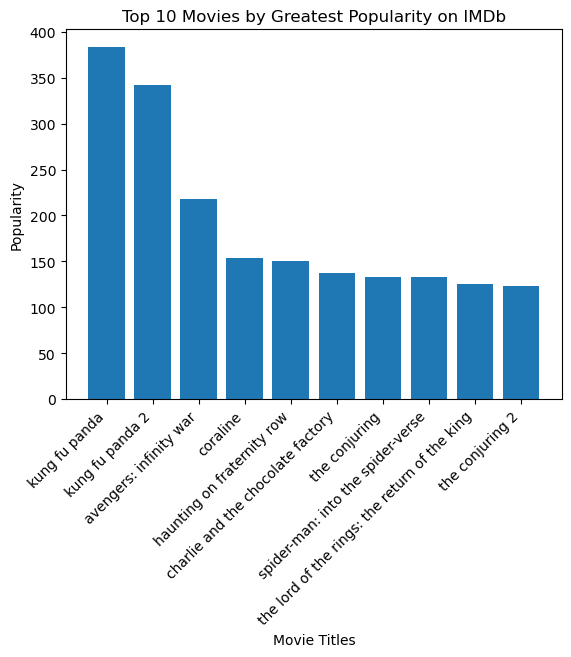

In [36]:
# Plotting top 10 movies with greatest vote counts across all years
plt.bar(most_votes['title'], most_votes['popularity'])
plt.xlabel("Movie Titles")
plt.ylabel("Popularity")
plt.title("Top 10 Movies by Greatest Popularity on IMDb")
plt.xticks(range(len(most_votes)), most_votes['title'], rotation=45, ha='right')

# View graph
plt.show()

In [39]:
# Filtering by a specific production company
marvel = df.loc[df['production_companies']== 'Marvel Studios',:]

# Sort by popularity
marvel_sorted = marvel.sort_values(by="popularity",ascending=False)
marvel_sorted

,id,title,director,cast,country,release_year,genre_types,rating,duration,description,popularity,production_companies,writers,combined,original_title
3432,299536,avengers: infinity war,"Anthony Russo, Joe Russo","Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...",United States,2018,"Action & Adventure, Sci-Fi & Fantasy",PG-13,150 min,Superheroes amass to stop intergalactic sociop...,218.13,Marvel Studios,"Larry Lieber, Steve Gan, Stan Lee, Steve Engle...","anthony russo, joe russorobert downey jr., jos...",Avengers: Infinity War
4987,284053,thor: ragnarok,Taika Waititi,"Chris Hemsworth, Tom Hiddleston, Cate Blanchet...",United States,2017,"Action & Adventure, Comedies, Sci-Fi & Fantasy",PG-13,131 min,To save Asgard from a bloodthirsty goddess of ...,79.87,Marvel Studios,"Larry Lieber, Stan Lee, Eric Pearson, Christop...","taika waititichris hemsworth, tom hiddleston, ...",Thor: Ragnarok
3411,363088,ant-man and the wasp,Peyton Reed,"Paul Rudd, Evangeline Lilly, Michael Douglas, ...",United States,2018,"Action & Adventure, Comedies, Sci-Fi & Fantasy",PG-13,118 min,"Problems big and small pop up when Scott Lang,...",53.32,Marvel Studios,"Larry Lieber, Chris McKenna, Andrew Barrer, St...","peyton reedpaul rudd, evangeline lilly, michae...",Ant-Man and the Wasp


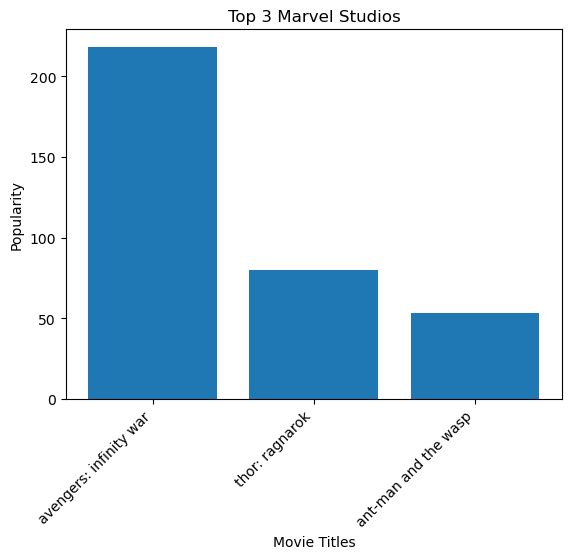

In [40]:
# Plotting top 3 Movies by Marvel Studios
plt.bar(marvel_sorted['title'], marvel_sorted['popularity'])
plt.xlabel("Movie Titles")
plt.ylabel("Popularity")
plt.title("Top 3 Marvel Studios")
plt.xticks(range(len(marvel_sorted)), marvel_sorted['title'], rotation=45, ha='right')

# View graph
plt.show()

The finding above shows that the dataset lacks larger scale of movies, e.x. 'Marvel Studios', skewing the top movie results by 'Marvel Studios' to only 3, dismissing other 'Marvel Studio' films that gained greater popularity